Acá importamos las librerias que son necesarias para el resto del código. 

In [3]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt

Invocamos los datos que hemos importado tales como las 'reservas'. 'reporte de ingreso año 2024' y el 'check-in' 

In [74]:
df = pd.read_csv(r'C:\Users\Yenifer\absolute\itec\reservas 27032024 27032025.csv', sep=';', skiprows=1, encoding='utf-8')
df2 = pd.read_csv(r'C:\Users\Yenifer\absolute\itec\reporte de ingreso año 2024 a la fecha.csv', sep=';', encoding='latin1')
df3 = pd.read_excel(r'C:\Users\Yenifer\\absolute\itec\Check-in del 2024-03-27 al 2025-03-28 bookin.xls', sheet_name='Sheet1', header=0)

In [84]:
df

,Titular,Tipo doc,NÃºmero doc,Nacionalidad,Email,Fecha de nacimiento,GÃ©nero,HabitaciÃ³n,Ingreso,Salida,...,Creada por,Fecha creaciÃ³n,CÃ³digo de la reserva,Total alojamiento,Estatus,ID CategorÃ­a,Myallocator ID categorÃ­a,Myallocator ID,Myallocator ID de agencia,Noches
0,alba quintero,CÃ©dula de ciudadanÃ­a,1067848216,Colombia,NaN,10/11/1985,Femenino,TRIPLES PRIVADO SAN RAFAEL,2025-03-26 05:00:00,2025-03-27 05:00:00,...,Jhon117,27/03/2025 1:12,15351926,79900.0,NaN,32364,NaN,NaN,NaN,1
1,jose acosta,CÃ©dula de ciudadanÃ­a,111585061,Colombia,NaN,NaN,Masculino,4 o 5 PAX PRIVADO GUATAPE,2025-03-26 05:00:00,2025-03-27 05:00:00,...,Jhon117,26/03/2025 22:40,15350047,80000.0,NaN,32367,NaN,NaN,NaN,1
2,jonathan VARGAS,CÃ©dula de ciudadanÃ­a,1115913988,Colombia,NaN,5/07/1992,Masculino,TITIRIBI TITIRIBI,2025-03-26 05:00:00,2025-03-27 05:00:00,...,Jhon117,26/03/2025 22:40,15350041,49900.0,NaN,32399,NaN,NaN,NaN,1
3,Edgar Armando Mena Montoya,NaN,NaN,NaN,NaN,NaN,NaN,LA CEJA DORMITORIO Ceja 6,2025-03-27 05:00:00,2025-03-31 05:00:00,...,Jhon117,26/03/2025 15:21,15343929,0.0,Cuenta pagada,32361,NaN,NaN,NaN,4
4,juan gomez,CÃ©dula de ciudadanÃ­a,1000019294,Colombia,NaN,25/05/2002,Masculino,TITIRIBI TITIRIBI,2025-03-25 05:00:00,2025-03-26 05:00:00,...,Jhon117,25/03/2025 22:14,15337114,50000.0,NaN,32399,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,ana hernandez bustos,CÃ©dula de ciudadanÃ­a,109876882,Colombia,NaN,27/04/1995,Femenino,SANTA FE BAÃ‘O EXTERNO SANTA FE,2024-03-27 05:00:00,2024-03-31 05:00:00,...,jaime andres rocha,28/03/2024 1:47,11398621,520000.0,NaN,32398,NaN,NaN,NaN,4
2463,A ldo Suros,NaN,NaN,NaN,NaN,NaN,Masculino,LA CEJA DORMITORIO Ceja 3,2024-03-27 05:00:00,2024-03-28 05:00:00,...,jaime andres rocha,27/03/2024 23:45,11397430,32023.0,Cuenta pagada,32361,NaN,NaN,NaN,1
2464,Daniel El Khoury,Pasaporte,23HE81140,Francia,NaN,3/06/1994,Masculino,4 o 5 PAX PRIVADO PEÃ‘OL,2024-03-28 05:00:00,2024-03-29 05:00:00,...,jaime andres rocha,27/03/2024 23:35,11397280,115572.0,NaN,32367,NaN,NaN,NaN,1
2465,KARIM BOURAS,Pasaporte,20EA11230,Francia,NaN,24/12/1990,Masculino,LA CEJA DORMITORIO Ceja 5,2024-03-28 05:00:00,2024-03-31 05:00:00,...,jaime andres rocha,27/03/2024 19:48,11394517,81000.0,NaN,32361,NaN,NaN,NaN,3


In [ ]:
# Asegúrate de que las columnas de fecha sean del tipo datetime
df['Ingreso'] = pd.to_datetime(df['Ingreso'], errors='coerce')
df['Salida'] = pd.to_datetime(df['Salida'], errors='coerce')

# Crear una nueva columna con la cantidad de noches
df['Noches'] = (df['Salida'] - df['Ingreso']).dt.days

# Verificar que se agregó correctamente
print(df[['Titular', 'Ingreso', 'Salida', 'Noches']].head())


                      Titular             Ingreso              Salida  Noches
0               alba quintero 2025-03-26 05:00:00 2025-03-27 05:00:00       1
1                 jose acosta 2025-03-26 05:00:00 2025-03-27 05:00:00       1
2             jonathan VARGAS 2025-03-26 05:00:00 2025-03-27 05:00:00       1
3  Edgar Armando Mena Montoya 2025-03-27 05:00:00 2025-03-31 05:00:00       4
4                  juan gomez 2025-03-25 05:00:00 2025-03-26 05:00:00       1


C:\Users\Yenifer\AppData\Local\Temp\ipykernel_4580\3849191218.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ingreso'] = pd.to_datetime(df['Ingreso'], errors='coerce')
C:\Users\Yenifer\AppData\Local\Temp\ipykernel_4580\3849191218.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Salida'] = pd.to_datetime(df['Salida'], errors='coerce')


In [78]:
# Agrupar por titular (nombre del cliente) y sumar la cantidad total de noches
estadias_por_cliente = df.groupby('Titular')['Noches'].sum().reset_index()

# Ordenar de mayor a menor para ver quiénes se quedaron más tiempo
estadias_por_cliente = estadias_por_cliente.sort_values(by='Noches', ascending=False)

# Mostrar los primeros resultados
print(estadias_por_cliente.head())


                       Titular  Noches
610             GUSTAVO MUÃ‘OZ      98
721               JEROME CAINE      78
385             Daniel Alvarez      63
459   Duvan Hernandez Otalvaro      48
1370           Pavel Michailin      47


invocamos el DataFrame de 'df'

In [6]:
# Elimina los valores nulos para evitar errores
genero = df['GÃ©nero'].dropna()

# Cuenta cuántos hay de cada género
conteo = genero.value_counts()

# Calcula el porcentaje
porcentaje = genero.value_counts(normalize=True) * 100

# Muestra resultados
print("Conteo por género:\n", conteo)
print("\nPorcentaje por género:\n", porcentaje)


Conteo por género:
 GÃ©nero
Masculino    1336
Femenino      803
Name: count, dtype: int64

Porcentaje por género:
 GÃ©nero
Masculino    62.459093
Femenino     37.540907
Name: proportion, dtype: float64


Los datos faltantes (missing_data) que hay en cada columna, osea los datos que la gente no registra. 

In [7]:
# ...existing code...

# Contar los datos faltantes en cada columna
missing_data = df.isnull().sum()
print(missing_data)

# ...existing code...

Titular                               0
Tipo doc                             85
NÃºmero doc                         103
Nacionalidad                        102
Email                              2118
Fecha de nacimiento                 180
GÃ©nero                             328
HabitaciÃ³n                           0
Ingreso                               0
Salida                                0
OcupaciÃ³n(NÃºmero de personas)       0
Plan                               2467
Canal                              2238
Creada por                            0
Fecha creaciÃ³n                       0
CÃ³digo de la reserva                 0
Total alojamiento                     0
Estatus                            2065
ID CategorÃ­a                         0
Myallocator ID categorÃ­a          2467
Myallocator ID                     2467
Myallocator ID de agencia          2467
dtype: int64


En este código, buscamos eliminar los datos que no necesitamos cuyos datos faltantes exceden de los 2000 y a su vez los eliminamos de las columnas del DataFrame. 

In [8]:
# ...existing code...

# Contar los datos faltantes en cada columna
missing_data = df.isnull().sum()

# Definir el umbral de datos faltantes (más de 2000)
threshold = 2000

# Identificar las columnas que exceden el umbral
columns_to_drop = missing_data[missing_data > threshold].index

# Eliminar las columnas del DataFrame
df = df.drop(columns=columns_to_drop)

# Mostrar las columnas eliminadas
print(f"Columnas eliminadas: {list(columns_to_drop)}")

# ...existing code...

Columnas eliminadas: ['Email', 'Plan', 'Canal', 'Estatus', 'Myallocator ID categorÃ\xada', 'Myallocator ID', 'Myallocator ID de agencia']


La información de los datos que se han llenado en cada columna de los 2467 que se han registrado (entries)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Titular                          2467 non-null   object 
 1   Tipo doc                         2382 non-null   object 
 2   NÃºmero doc                      2364 non-null   object 
 3   Nacionalidad                     2365 non-null   object 
 4   Fecha de nacimiento              2287 non-null   object 
 5   GÃ©nero                          2139 non-null   object 
 6   HabitaciÃ³n                      2467 non-null   object 
 7   Ingreso                          2467 non-null   object 
 8   Salida                           2467 non-null   object 
 9   OcupaciÃ³n(NÃºmero de personas)  2467 non-null   int64  
 10  Creada por                       2467 non-null   object 
 11  Fecha creaciÃ³n                  2467 non-null   object 
 12  CÃ³digo de la reserv

In [10]:
df2

,Fecha,Cliente,Tipo doc,Producto,Descripción,Valor,Forma de pago,Registrado por,Reserva #,Factura #,Transacción #,Comprobante #
0,27/03/2025 15:48,Koneczna Magdalena koneczna,C.E,CIFRUT,pagado jony,"2,000.00",Efectivo,Jhon117,15248106.0,NaN,12787798,NaN
1,27/03/2025 15:48,Koneczna Magdalena koneczna,C.E,Cargo extra,lavanderÃ­a jony,"23,000.00",Efectivo,Jhon117,15248106.0,NaN,12787798,NaN
2,27/03/2025 10:46,Mateo Barrera,C.C,Alojamiento,pagada a jony,"47,500.00",Transferencia bancaria,Jhon117,15079614.0,NaN,12784271,NaN
3,26/03/2025 20:15,alba quintero,C.C,Alojamiento,NaN,"79,900.00",Efectivo,Jhon117,15351926.0,NaN,12780162,NaN
4,26/03/2025 17:54,jose acosta,C.C,Alojamiento,recibe jony,"80,000.00",Transferencia bancaria,Jhon117,15350047.0,NaN,12778441,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10047,27/03/2024 10:52,Gerrit Lieb,Pasaporte,Alojamiento,NaN,"119,600.00",Efectivo,jaime andres rocha,11351140.0,NaN,8750962,NaN
10048,27/03/2024 10:14,Ivan Camilo Hernandez,C.C,AGUA,NaN,"3,500.00",Efectivo,jaime andres rocha,11386479.0,NaN,8750344,NaN
10049,27/03/2024 7:36,Marthe dutey,Pasaporte,POSTOBON,NaN,"3,000.00",Efectivo,jaime andres rocha,NaN,NaN,8748794,NaN
10050,27/03/2024 0:27,Juan Roberto Soto,Pasaporte,CERVEZA PILSEN,NaN,"6,000.00",Efectivo,jaime andres rocha,10450398.0,NaN,8748140,NaN


Mostrar la informacion del segundo Data Frame "info()"

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha           10052 non-null  object 
 1   Cliente         8414 non-null   object 
 2   Tipo doc        8152 non-null   object 
 3   Producto        10052 non-null  object 
 4   Descripción     766 non-null    object 
 5   Valor           10052 non-null  object 
 6   Forma de pago   10052 non-null  object 
 7   Registrado por  10052 non-null  object 
 8   Reserva #       6722 non-null   float64
 9   Factura #       48 non-null     object 
 10  Transacción #   10052 non-null  int64  
 11  Comprobante #   3 non-null      float64
dtypes: float64(2), int64(1), object(9)
memory usage: 942.5+ KB


Contamos los datos que faltan en cada columna y lo mostramos. 

In [ ]:
# ...existing code...

# Contar los datos faltantes en cada columna
missing_data = df2.isnull().sum()
print(missing_data)

# ...existing code...

Fecha                 0
Cliente            1638
Tipo doc           1900
Producto              0
Descripción        9286
Valor                 0
Forma de pago         0
Registrado por        0
Reserva #          3330
Factura #         10004
Transacción #         0
Comprobante #     10049
dtype: int64


En este codigo se procede a eliminar las columnas de los datos faltantes que se exceden mas de 9000 y se muestra abajo la lista de las columnas eliminadas.

In [94]:
# ...existing code...

# Contar los datos faltantes en cada columna de df2
missing_data_df2 = df2.isnull().sum()

# Definir el umbral de datos faltantes (más de 9000)
threshold_df2 = 9000

# Identificar las columnas que exceden el umbral
columns_to_drop_df2 = missing_data_df2[missing_data_df2 > threshold_df2].index

# Eliminar las columnas del DataFrame df2
df2 = df2.drop(columns=columns_to_drop_df2)

# Mostrar las columnas eliminadas
print(f"Columnas eliminadas de df2: {list(columns_to_drop_df2)}")

# ...existing code...

Columnas eliminadas de df2: ['Descripción', 'Factura #', 'Comprobante #']


In [95]:
df3

,Número de reserva,Reservado por,Nombre del cliente (o clientes),Entrada,Salida,Fecha de reserva,Estado,Habitaciones,Personas,Adultos,...,Comentarios,Grupo de reserva,Booker country,Motivo del viaje,Dispositivo,Tipo de unidad,Duración (noches),Fecha de cancelación,Dirección,Número de teléfono
0,4396111470,"Parra, John S.",John S. Parra,2024-03-27,2024-03-28,2024-03-27 12:11:31,ok,1,1,NaN,...,NaN,NaN,co,Ocio,Móvil,Dormitorio,1,NaN,NaN,NaN
1,4557704876,"López, Jojanna",Jojanna López,2024-03-27,2024-03-28,2024-03-25 10:32:33,cancelled_by_guest,1,1,NaN,...,NaN,NaN,co,Ocio,Móvil,Dormitorio,1,2024-03-26 19:32:31,NaN,NaN
2,4637253976,"Surós, Aldo",Aldo Surós,2024-03-27,2024-03-28,2024-03-27 18:40:32,ok,1,1,NaN,...,NaN,NaN,cr,NaN,Móvil,Dormitorio,1,NaN,NaN,NaN
3,4689813600,"Le Roy, Victor",Victor Le Roy,2024-03-27,2024-03-28,2024-03-27 21:06:36,ok,1,1,NaN,...,NaN,NaN,co,Ocio,Móvil,Dormitorio,1,NaN,NaN,NaN
4,4897263353,"Hernandez, Ana Milena",Ana Milena Hernandez,2024-03-27,2024-03-28,2024-03-27 20:18:03,ok,1,3,NaN,...,NaN,NaN,co,Ocio,Móvil,Basic Triple Room with Shared Bathroom,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,4502890135,"moreno, liseth",liseth moreno,2025-03-20,2025-03-23,2025-02-01 13:21:39,cancelled_by_guest,1,4,4.0,...,NaN,NaN,co,Ocio,Móvil,Quadruple Room with Shared Bathroom,3,2025-03-04 00:05:11,NaN,NaN
2282,4749774277,"Trejos Cueto, José Manuel",José Manuel Trejos Cueto,2025-03-22,2025-03-26,2025-01-22 08:00:41,ok,1,1,NaN,...,Approximate time of arrival: between 10:00 and...,NaN,co,Ocio,Móvil,Habitacion individual economica en lavanderia ...,4,NaN,NaN,NaN
2283,4942788539,"Magdalena, Koneczna",Koneczna Magdalena,2025-03-23,2025-03-27,2025-02-21 08:59:49,ok,1,1,NaN,...,Approximate time of arrival: between 21:00 and...,NaN,pl,Ocio,Ordenador,Dormitorio,4,NaN,NaN,NaN
2284,4517617109,"Larouche, Mario",Mario Larouche,2025-03-25,2025-03-27,2025-02-13 18:07:20,cancelled_by_guest,1,1,NaN,...,NaN,NaN,ca,Ocio,Móvil,Dormitorio,2,2025-03-11 01:02:56,NaN,NaN


In [96]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Número de reserva                2286 non-null   int64  
 1   Reservado por                    2286 non-null   object 
 2   Nombre del cliente (o clientes)  2257 non-null   object 
 3   Entrada                          2286 non-null   object 
 4   Salida                           2286 non-null   object 
 5   Fecha de reserva                 2286 non-null   object 
 6   Estado                           2286 non-null   object 
 7   Habitaciones                     2286 non-null   int64  
 8   Personas                         2286 non-null   int64  
 9   Adultos                          28 non-null     float64
 10  Niños                            28 non-null     float64
 11  Edades de los niños:             1 non-null      float64
 12  Precio              

In [97]:
missing_data = df3.isnull().sum()
print(missing_data)

Número de reserva                     0
Reservado por                         0
Nombre del cliente (o clientes)      29
Entrada                               0
Salida                                0
Fecha de reserva                      0
Estado                                0
Habitaciones                          0
Personas                              0
Adultos                            2258
Niños                              2258
Edades de los niños:               2285
Precio                                0
Comisión %                            0
Importe de la comisión              890
Estado del pago                    2284
Forma de pago                      2286
Comentarios                        1717
Grupo de reserva                   2286
Booker country                        0
Motivo del viaje                    504
Dispositivo                           6
Tipo de unidad                        0
Duración (noches)                     0
Fecha de cancelación               1730


In [98]:
# ...existing code...

# Contar los datos faltantes en cada columna de df3
missing_data_df3 = df3.isnull().sum()

# Definir el umbral de datos faltantes (más de 2000)
threshold_df3 = 2000

# Identificar las columnas que exceden el umbral
columns_to_drop_df3 = missing_data_df3[missing_data_df3 > threshold_df3].index

# Eliminar las columnas del DataFrame df3
df3 = df3.drop(columns=columns_to_drop_df3)

# Mostrar las columnas eliminadas
print(f"Columnas eliminadas de df3: {list(columns_to_drop_df3)}")

# ...existing code...

Columnas eliminadas de df3: ['Adultos', 'Niños', 'Edades de los niños:', 'Estado del pago', 'Forma de pago', 'Grupo de reserva', 'Dirección', 'Número de teléfono']


In [99]:
# ...existing code...

# Contar la cantidad de registros por cada motivo del viaje
motivo_viaje_counts = df3['Motivo del viaje'].value_counts()
print(motivo_viaje_counts)

# ...existing code...

Motivo del viaje
Ocio       1574
Trabajo     208
Name: count, dtype: int64


In [100]:
# ...existing code...

# Eliminar la columna "Motivo del viaje" del DataFrame df3
df3 = df3.drop(columns=['Motivo del viaje'])

# Mostrar un mensaje confirmando la eliminación
print("La columna 'Motivo del viaje' ha sido eliminada.")

# ...existing code...

La columna 'Motivo del viaje' ha sido eliminada.


In [101]:
# ...existing code...

# Eliminar la columna "Dispositivo" del DataFrame df3
df3 = df3.drop(columns=['Dispositivo'])

# Mostrar un mensaje confirmando la eliminación
print("La columna 'Dispositivo' ha sido eliminada.")

La columna 'Dispositivo' ha sido eliminada.


### union de los datos segun el cliente 



In [111]:

import unidecode

# Función para limpiar nombres
def normalizar(nombre):
    if pd.isna(nombre):
        return ''
    return unidecode.unidecode(str(nombre).lower().strip())

# Normalizamos en todos los DF
df['nombre_cliente'] = df['Titular'].apply(normalizar)
df2['nombre_cliente'] = df2['Cliente'].apply(normalizar)
df3['nombre_cliente'] = df3['Nombre del cliente (o clientes)'].apply(normalizar)


In [23]:
df_completo = pd.merge(df, df2, on='nombre_cliente', how='outer', suffixes=('_reserva', '_consumo'))

In [34]:
# Unión con info externa
df_completo1 = pd.merge(df_completo, df3, on='nombre_cliente', how='outer', suffixes=('', '_externa'))

In [66]:


df = df_completo1.copy()

# 1. Filtrar solo reservas efectivas (Estado == 'ok'), y hacemos copy para evitar warnings
df_efectivas = df[df['Estado'].str.lower() == 'ok'].copy()

# 2. Convertir 'Ingreso' a datetime
df_efectivas['Ingreso'] = pd.to_datetime(df_efectivas['Ingreso'], errors='coerce')

# 3. Crear columna 'Mes'
df_efectivas['Mes'] = df_efectivas['Ingreso'].dt.to_period('M')

# 4. Asegurarnos de que 'Total alojamiento' esté en formato numérico
df_efectivas['Total alojamiento'] = pd.to_numeric(df_efectivas['Total alojamiento'], errors='coerce')

# 5. Agrupar por mes y sumar ingresos
ingresos_mensuales = df_efectivas.groupby('Mes')['Total alojamiento'].sum()

# 6. Calcular el promedio mensual
promedio_mensual = ingresos_mensuales.mean()

# 7. Mostrar resultado
print("✅ Ingreso mensual promedio por reservas efectivas: ${:,.2f}".format(promedio_mensual))



✅ Ingreso mensual promedio por reservas efectivas: $20,057,271.00


In [54]:
df_completo1

,Titular,Tipo doc_reserva,NÃºmero doc,Nacionalidad,Fecha de nacimiento,GÃ©nero,HabitaciÃ³n,Ingreso,Salida,OcupaciÃ³n(NÃºmero de personas),...,Personas,Precio,Comisión %,Importe de la comisión,Comentarios,Booker country,Tipo de unidad,Duración (noches),Fecha de cancelación,Mes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,169500 COP,14.0,NaN,NaN,pa,Dormitorio,5.0,2024-04-22 23:48:24,2024-04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,223972 COP,14.0,31356.08 COP,NaN,ec,Twin Room with Private Bathroom,3.0,NaN,2024-07
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,25110 COP,16.0,NaN,NaN,co,Dormitorio,1.0,2024-10-29 15:56:03,2024-10
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,26910 COP,16.0,NaN,Viajo por trabajo y quizá utilice la tarjeta d...,co,Dormitorio,1.0,NaN,2024-11
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,314048.35 COP,16.0,50247.736 COP,Approximate time of arrival: between 17:00 and...,de,Double Room with Private Bathroom,4.0,NaN,2025-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72206,Zuly mariana Bastidas garcia,CÃ©dula de ciudadanÃ­a,1005253281,Colombia,16/09/2001,Femenino,4 o 5 PAX PRIVADO JERICO,18/10/2024 5:00,26/10/2024 5:00,2.0,...,2.0,474514.2 COP,16.0,75922.272 COP,Approximate time of arrival: between 06:00 and...,co,Double Room with Private Bathroom,8.0,NaN,2024-10
72207,Zuly mariana Bastidas garcia,CÃ©dula de ciudadanÃ­a,1005253281,Colombia,16/09/2001,Femenino,4 o 5 PAX PRIVADO JERICO,18/10/2024 5:00,26/10/2024 5:00,2.0,...,2.0,474514.2 COP,16.0,75922.272 COP,Approximate time of arrival: between 06:00 and...,co,Double Room with Private Bathroom,8.0,NaN,2024-10
72208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,57076.2 COP,16.0,9132.192 COP,NaN,gb,Dormitorio,3.0,NaN,2024-11
72209,Zuzanna Sadkiewicz Zuzanna Sadkiewicz,Pasaporte,ET0081530,Polinesia Francesa,4/07/2001,Femenino,LA CEJA DORMITORIO Ceja 4,11/11/2024 5:00,14/11/2024 5:00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [29]:


# Sacar clientes únicos de cada grupo
clientes_durmieron = set(df_completo[df_completo['Titular'].notna()]['nombre_cliente'].dropna().unique())
clientes_compraron = set(df_completo[df_completo['Producto'].notna()]['nombre_cliente'].dropna().unique())

# Clasificar los grupos
solo_durmieron = clientes_durmieron - clientes_compraron
solo_compraron = clientes_compraron - clientes_durmieron
ambos = clientes_durmieron & clientes_compraron

# Contar cuántos hay en cada grupo
cuentas = {
    'Solo durmieron': len(solo_durmieron),
    'Solo compraron': len(solo_compraron),
    'Durmieron y compraron': len(ambos)
}


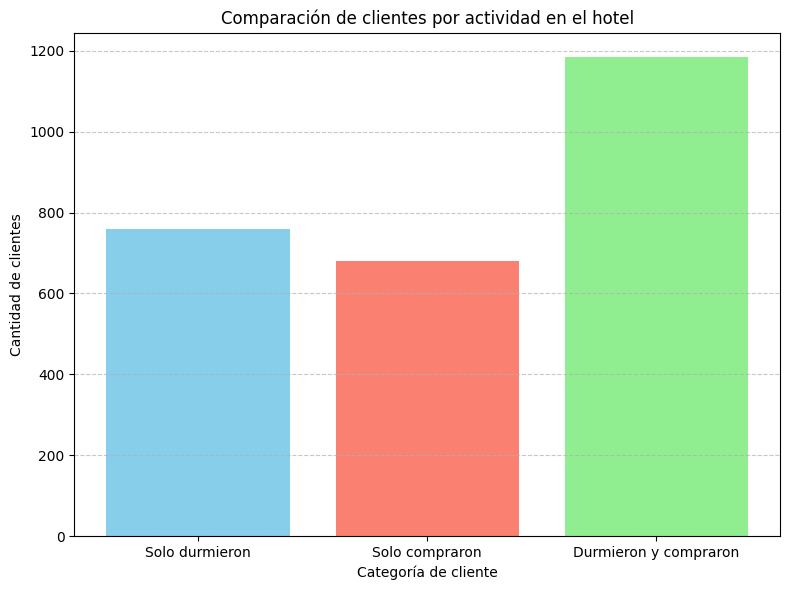

In [30]:
# Graficar
%matplotlib inline


plt.figure(figsize=(8, 6))
plt.bar(cuentas.keys(), cuentas.values(), color=['skyblue', 'salmon', 'lightgreen']) 
plt.title('Comparación de clientes por actividad en el hotel')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Categoría de cliente')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


INFORME DE ANÁLISIS: 

1. ¿Cuál es el ingreso mensual promedio por reservas efectivas?

In [71]:
import pandas as pd

# Asegurarse de que la columna 'Entrada' sea de tipo fecha
df_completo1['Entrada'] = pd.to_datetime(df_completo1['Entrada'], errors='coerce')

# Crear una columna con el mes y año de la entrada
df_completo1['Mes'] = df_completo1['Entrada'].dt.to_period('M')

# Generar un rango de meses esperados (por ejemplo, de enero 2024 a diciembre 2025)
meses_esperados = pd.period_range(start='2024-01', end='2025-12', freq='M')

# Obtener los meses presentes en el DataFrame
meses_presentes = df_completo1['Mes'].dropna().unique()

# Identificar los meses faltantes
meses_faltantes = [mes for mes in meses_esperados if mes not in meses_presentes]

# Mostrar los resultados
if meses_faltantes:
    print("❌ Meses faltantes en el DataFrame df_completo1:", ', '.join(map(str, meses_faltantes)))
else:
    print("✅ Todos los meses de 2024 y 2025 están presentes en el DataFrame df.")

❌ Meses faltantes en el DataFrame df_completo1: 2024-01, 2024-02, 2025-04, 2025-05, 2025-06, 2025-07, 2025-08, 2025-09, 2025-10, 2025-11, 2025-12


In [65]:
# Asegurarse de que la columna 'Fecha de reserva' sea de tipo fecha
df3['Fecha de reserva'] = pd.to_datetime(df3['Fecha de reserva'], errors='coerce')

# Crear una columna con el mes y año de la fecha
df3['Mes'] = df3['Fecha de reserva'].dt.to_period('M')

# Generar un rango de meses esperados (de enero 2024 a diciembre 2025)
meses_esperados = pd.period_range(start='2024-01', end='2025-12', freq='M')

# Obtener los meses presentes en el DataFrame
meses_presentes = df3['Mes'].dropna().unique()

# Identificar los meses faltantes
meses_faltantes = [mes for mes in meses_esperados if mes not in meses_presentes]

# Mostrar los resultados
if meses_faltantes:
    print("❌ Meses faltantes en df3:", ', '.join(map(str, meses_faltantes)))
else:
    print("✅ Todos los meses de 2024 y 2025 están presentes en df3.")

❌ Meses faltantes en df3: 2025-04, 2025-05, 2025-06, 2025-07, 2025-08, 2025-09, 2025-10, 2025-11, 2025-12
